# Linear Regression

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [2]:
datafile = "lausanne-appart.csv"

Read the data

In [3]:
dataset = pd.read_csv(datafile)

Display first rows

In [4]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [5]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

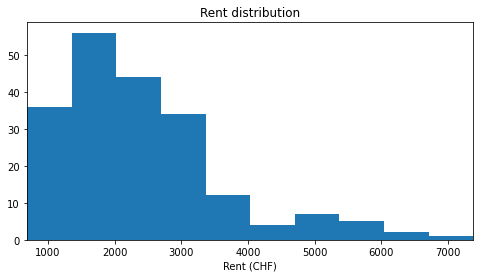

In [6]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

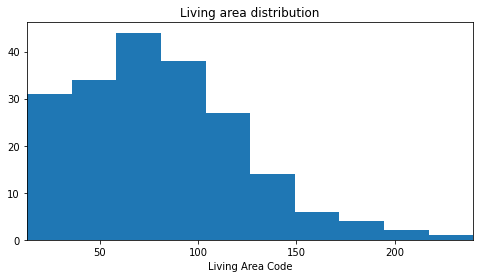

In [7]:
# Your code here

plt.figure(1, figsize=(8, 4))
plt.hist(living_area)
plt.xlabel("Living Area Code")
plt.title("Living area distribution")
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

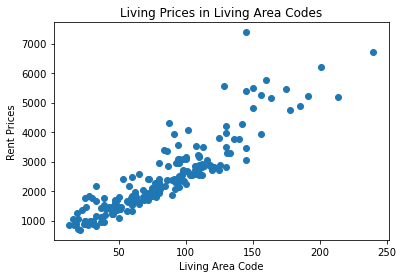

In [8]:
# Your code here

plt.scatter(living_area, rent_price)
plt.xlabel("Living Area Code")
plt.ylabel("Rent Prices")
plt.title("Living Prices in Living Area Codes")
plt.show()

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

Theta:  [240.07710727  26.33242457]


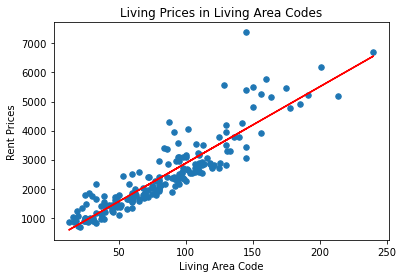

In [9]:
# Your code here

x_1 = np.copy(living_area)
y = np.copy(rent_price)

# using the normal equation
# add new x_0 with all 1s
x = np.array([np.ones(len(x_1)), x_1]).T
theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
 
print("Theta: ", theta)

# predict the values
y_hat = x.dot(theta)

plt.scatter(x_1, y, s=30, marker='o')
plt.plot(x_1, y_hat, c='red')
plt.xlabel("Living Area Code")
plt.ylabel("Rent Prices")
plt.title("Living Prices in Living Area Codes")
plt.show()

For a mathematical elaboration, see here: https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [10]:
# Your code here

costs = (1 / (2 * x.shape[0])) * np.sum((x.dot(theta)-y)**2)
print("Costs: ", costs)

Costs:  138034.95779787414


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Theta:  tensor([240.0771,  26.3324], dtype=torch.float64)


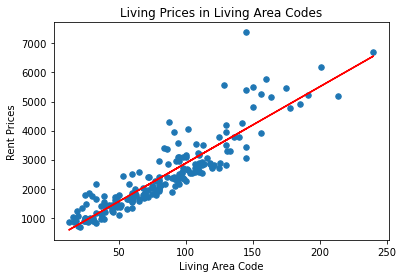

In [11]:
# Your code here

import torch

x_1 = torch.tensor(dataset['living_area'], dtype=torch.float64)
x_0 = torch.ones(x_1.size()[0], dtype=torch.float64)

x = torch.stack([x_0, x_1], 1)
y = torch.tensor(dataset['rent_price'], dtype=torch.float64)

theta = torch.mv(
    torch.mm(
        torch.linalg.inv(
            torch.mm(
                torch.transpose(x, 0, 1),x
            )
        ), torch.transpose(x, 0, 1)
    ), y
)

print("Theta: ", theta)

# predict the values
y_hat = torch.mv(x, theta)

plt.scatter(x_1, y, s=30, marker='o')
plt.plot(x_1, y_hat, c='red')
plt.xlabel("Living Area Code")
plt.ylabel("Rent Prices")
plt.title("Living Prices in Living Area Codes")
plt.show()


b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [13]:
# Your code here

costs = (1 / (2 * len(x))) * torch.sum((torch.mv(x, theta)-y)**2)
print("Costs: ", costs)

Costs:  tensor(138034.9578, dtype=torch.float64)
